In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.3.1


In [3]:
file = open('WISDM_ar_v1.1_raw.txt')
lines = file.readlines()
processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [5]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [6]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [7]:
data = pd.DataFrame(data=processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [8]:
data.shape

(343416, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [10]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

#### From readme we see this unbalanced data

In [11]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

### So we are going to balance the data

In [12]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


### from readme we see the data is in 20hertz

In [13]:
fs = 20

In [14]:
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

### its time to plot these activities in 20hertz

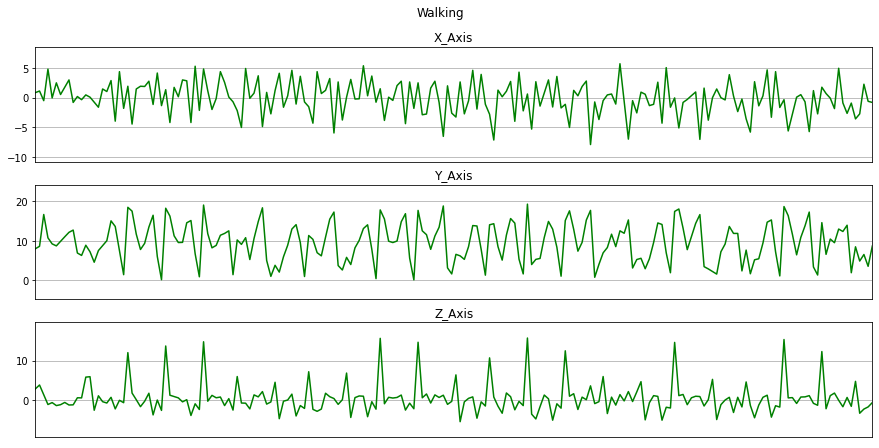

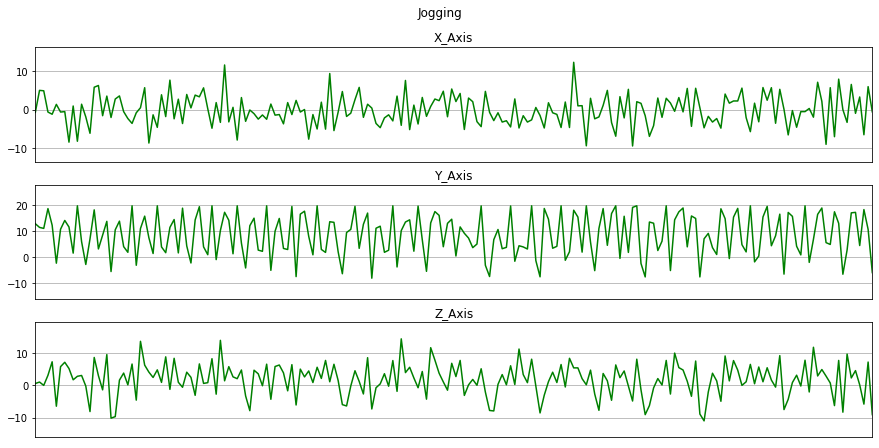

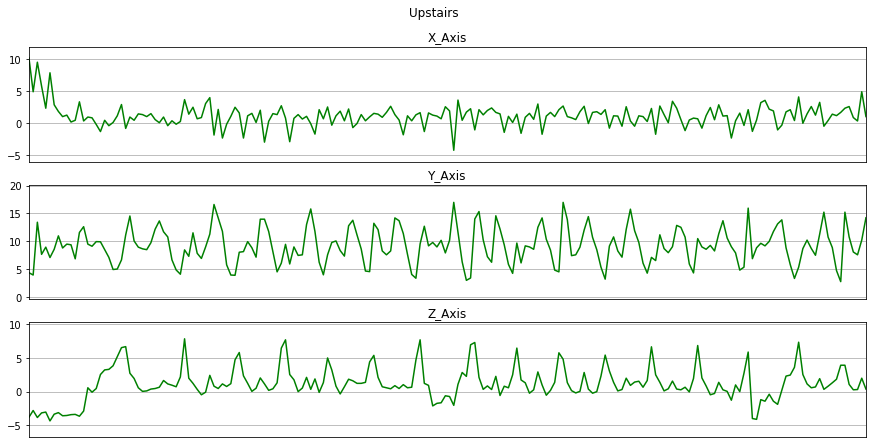

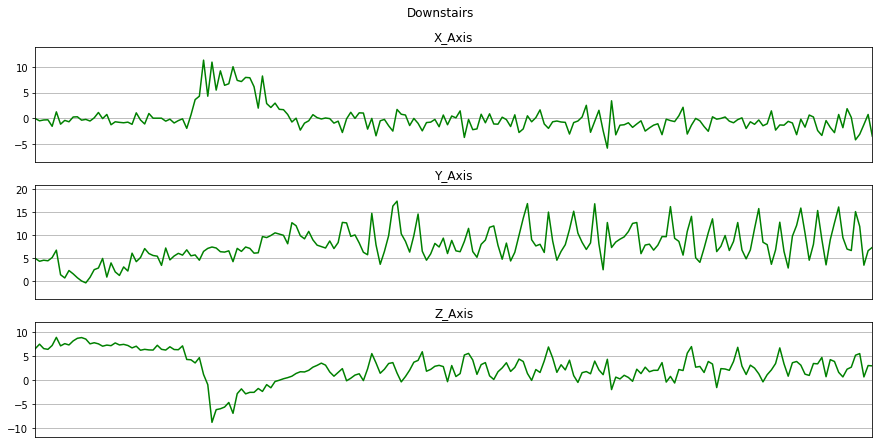

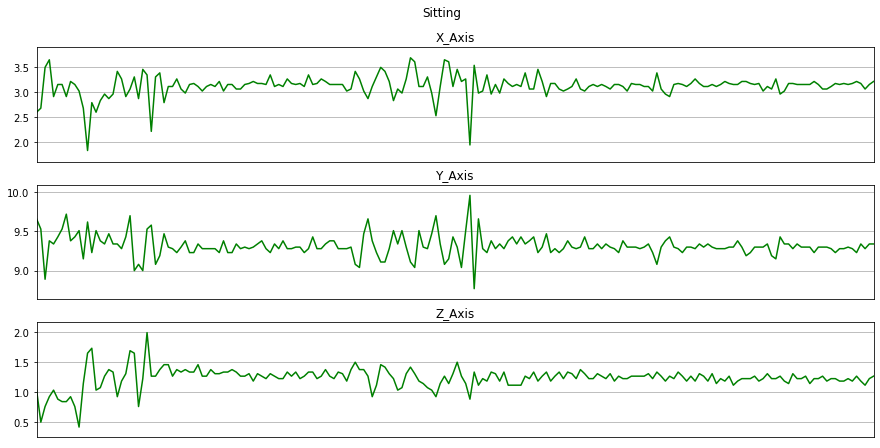

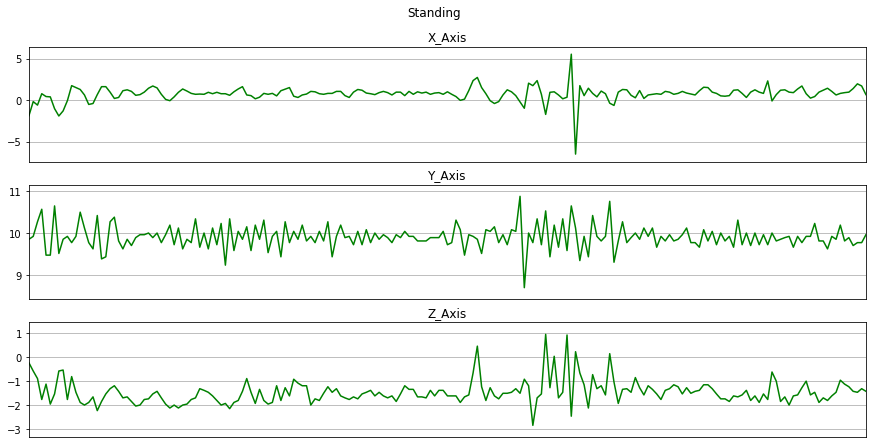

In [18]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize= (15, 7), sharex = True)
    plot_axis(ax0, data['time'], data['x'], 'X_Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y_Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z_Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:fs*10]
    plot_activity(activity, data_for_plot)

for deep neural network, these pattern are very easy to memorize and classify these activities according to the pattern

In [19]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [20]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [23]:
Walking = df[df['activity'] == 'Walking'].head(3555).copy()
Jogging = df[df['activity'] == 'Jogging'].head(3555).copy()
Upstairs = df[df['activity'] == 'Upstairs'].head(3555).copy()
Downstairs = df[df['activity'] == 'Downstairs'].head(3555).copy()
Sitting = df[df['activity'] == 'Sitting'].head(3555).copy()
Standing = df[df['activity'] == 'Standing'].head(3555).copy()

In [24]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [25]:
balanced_data['activity'].value_counts()

Jogging       3555
Downstairs    3555
Standing      3555
Upstairs      3555
Sitting       3555
Walking       3555
Name: activity, dtype: int64

In [26]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [27]:
from sklearn.preprocessing import LabelEncoder

labelling each Activity into values (Categorical values)

In [28]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [29]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

we see  the x,y,z values have high variance 
### Standardization

In [30]:
X = balanced_data[['x','y','z']]
y = balanced_data['label']

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


#### Frame Preparation

In [34]:
import scipy.stats as stats

In [35]:
fs = 20
frame_size = fs*4 #80 sec * 3d
hop_size = fs*2 #overlapping frame

In [36]:
def get_frames(df, frame_size, hop_size):
    
    n_features = 3 #(x,y,z)
    
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size): #advancing with the hop size i.e 40
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]  # ex 4 sec from each data
        
        label = stats.mode(df['label'][i : i + frame_size])[0][0]   # Retrieve the most often used label in this segment
        frames.append([x, y, z])
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, n_features) # Bring the segments into a better shape
    labels = np.asarray(labels)
    
    return frames, labels # feature and target varible

In [39]:
X, y  = get_frames(scaled_X, frame_size, hop_size)
X.shape, y.shape

((532, 80, 3), (532,))

In [40]:
(3555*6)/40 #3555 data for each activity i.e 6 we got 532 samples of X and y

533.25

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0, stratify = y)
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [42]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

Here we have 2d data but the CNN accepts the 3d data so we are going to reshape the data

In [43]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

### 2D CNN Model

In [44]:
model = Sequential()

model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1)) ## means 10 % of neurons will be drop randomly

model.add(Conv2D(32, (2, 2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense (6, activation = 'softmax'))

In [45]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [46]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/10
14/14 [==============================] - 0s 29ms/step - loss: 1.6029 - accuracy: 0.2612 - val_loss: 1.2893 - val_accuracy: 0.4953
Epoch 2/10
14/14 [==============================] - 0s 11ms/step - loss: 1.2015 - accuracy: 0.5529 - val_loss: 0.8885 - val_accuracy: 0.7383
Epoch 3/10
14/14 [==============================] - 0s 11ms/step - loss: 0.9549 - accuracy: 0.6188 - val_loss: 0.6201 - val_accuracy: 0.8224
Epoch 4/10
14/14 [==============================] - 0s 11ms/step - loss: 0.7039 - accuracy: 0.7506 - val_loss: 0.4611 - val_accuracy: 0.8131
Epoch 5/10
14/14 [==============================] - 0s 12ms/step - loss: 0.5316 - accuracy: 0.8000 - val_loss: 0.3429 - val_accuracy: 0.8785
Epoch 6/10
14/14 [==============================] - 0s 12ms/step - loss: 0.4368 - accuracy: 0.8424 - val_loss: 0.3544 - val_accuracy: 0.8785
Epoch 7/10
14/14 [==============================] - 0s 13ms/step - loss: 0.3912 - accuracy: 0.8729 - val_loss: 0.3080 - val_accuracy: 0.8785
Epoch 8/10
14

### accuracy = 92% and validation accuracy = 91%

In [47]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1,epoch+1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'validation'], loc = 'upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'validation'], loc = 'upper left')
    plt.show()

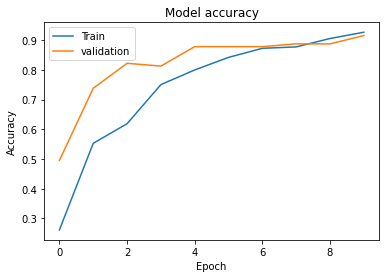

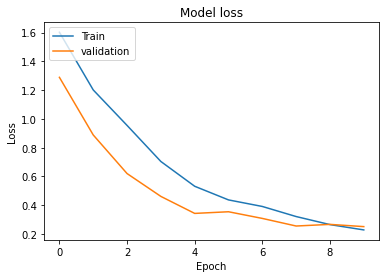

In [48]:
plot_learningCurve(history, 10)

here we see our model did a great job in both training and validation i.e its neither underfitting or overfitting

### Now plotting confusion matrix

In [49]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [54]:
y_pred = np.argmax(model.predict(X_test), axis=-1) ## tensorflow latest version before it was simply model.predict_classes(X_test)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

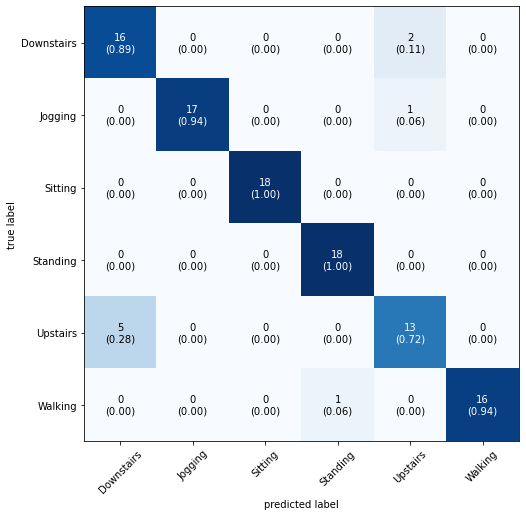

In [56]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = mat, class_names = label.classes_, show_normed = True, figsize = (8,8))

Our model showing 72% of accuracy with upstairs, it is confusing with downstairs. Nonetheless other activities achieved almost perfect accuracy 